In [1]:
import sys
sys.path.insert(0,'../')

In [2]:
import numpy as np
import pylab as plt
import pandas as pd
from copy import deepcopy
import sklearn as sk
from pathlib import Path

from pympute import *

GPU functionality is not available!


In [3]:
# dtime = 1
# realization = '2nd'

# data = pd.read_hdf('sample_data/data_{}_{}.h5'.format(realization,dtime),'data').drop(columns=['PT_ID'])
# masked = pd.read_hdf('sample_data/data_{}_{}.h5'.format(realization,dtime),'masked').drop(columns=['PT_ID'])

In [41]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data = pd.DataFrame(data=data['data'],columns=data['feature_names'])
print(data.shape)
data.head(5)

(569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [42]:
n1_miss,n2_miss = 50,150
masked = deepcopy(data)
for col in data.columns:
    n_miss = np.random.randint(n1_miss,n2_miss)
    i_miss = np.random.randint(0,data[col].shape[0],n_miss)
    masked.loc[i_miss,col] = np.nan

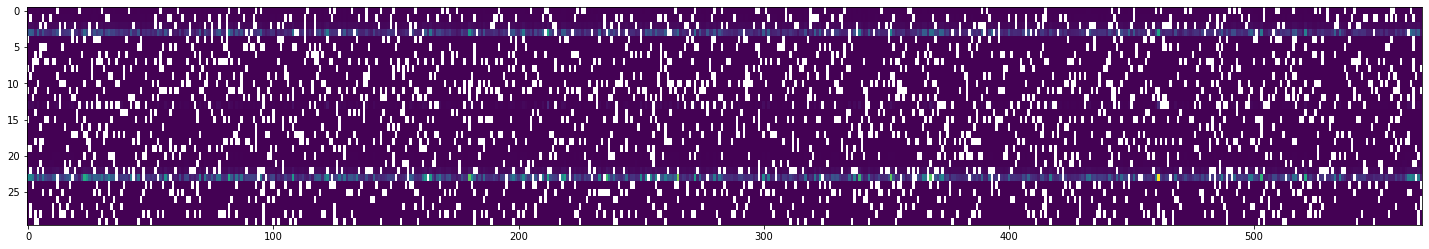

In [43]:
fig,ax = plt.subplots(figsize=(25,4))
ax.imshow(masked.T.values,interpolation='none',aspect='auto')

- More options for centralization (meanless), rescaling, 
- Important if it is longitodinal

In [44]:
normin,normax = get_range(masked.values)
masked_n = set_range(masked,normin,normax)
data_n = set_range(data,normin,normax)

In [45]:
masked_n.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.538627,0.022658,0.545989,0.363733,NaN,0.792037,0.703140,0.731113,NaN,0.605518,...,0.620776,0.130634,0.668310,0.450698,0.601136,0.700970,0.568610,0.912027,0.721311,0.418864
1,0.664856,NaN,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,NaN,...,0.606901,0.294737,NaN,0.435214,0.347553,0.174949,0.192971,NaN,NaN,0.222878
2,0.621801,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,NaN,NaN,0.211247,...,0.556386,0.351957,0.508442,0.374508,NaN,0.436202,0.359744,0.835052,0.486576,0.213433


In [9]:
imp = Imputer(masked_n,'LR-r',loss_f=None,fill_method='random',save_history=True)
imp.impute(10,inds=None)

100%|██████████| 300/300 [00:18<00:00, 16.08it/s]


In [10]:
# data_n.to_csv('../sample_data/sample_truth.csv',index=0)

In [8]:
imp.save('./')

<AxesSubplot:xlabel='iteration #', ylabel='loss function'>

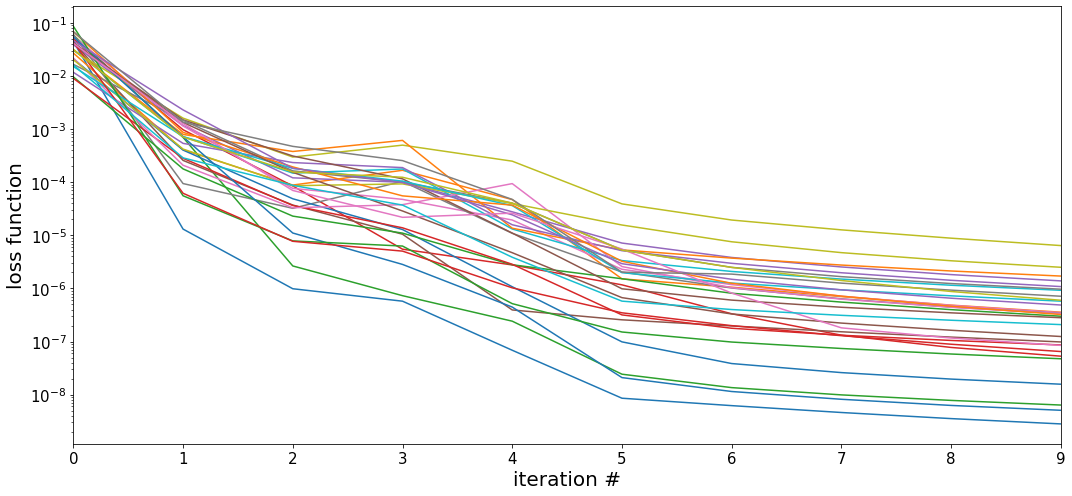

In [11]:
imp.plot_loss_frame()

In [12]:
# read about pmm 

In [13]:
# imp.models['mean texture'].coef_

In [14]:
# # imp.models['mean texture'] = 
# {'mean radius': LinearRegression(),
#  'mean texture': LinearRegression(),
#  'mean perimeter': LinearRegression(),
#  'mean area': LinearRegression(),
#  'mean smoothness': LinearRegression(),
#  'mean compactness': LinearRegression(),
#  'mean concavity': LinearRegression(),
#  'mean concave points': LinearRegression(),
#  'mean symmetry': LinearRegression(),
#  'mean fractal dimension': LinearRegression(),
#  'radius error': LinearRegression(),
#  'texture error': LinearRegression(),
#  'perimeter error': LinearRegression(),
#  'area error': LinearRegression(),
#  'smoothness error': LinearRegression(),
#  'compactness error': LinearRegression(),
#  'concavity error': LinearRegression(),
#  'concave points error': LinearRegression(),
#  'symmetry error': LinearRegression(),
#  'fractal dimension error': LinearRegression(),
#  'worst radius': LinearRegression(),
#  'worst texture': LinearRegression(),
#  'worst perimeter': LinearRegression(),
#  'worst area': LinearRegression(),
#  'worst smoothness': LinearRegression(),
#  'worst compactness': LinearRegression(),
#  'worst concavity': LinearRegression(),
#  'worst concave points': LinearRegression(),
#  'worst symmetry': LinearRegression(),
#  'worst fractal dimension': LinearRegression()}

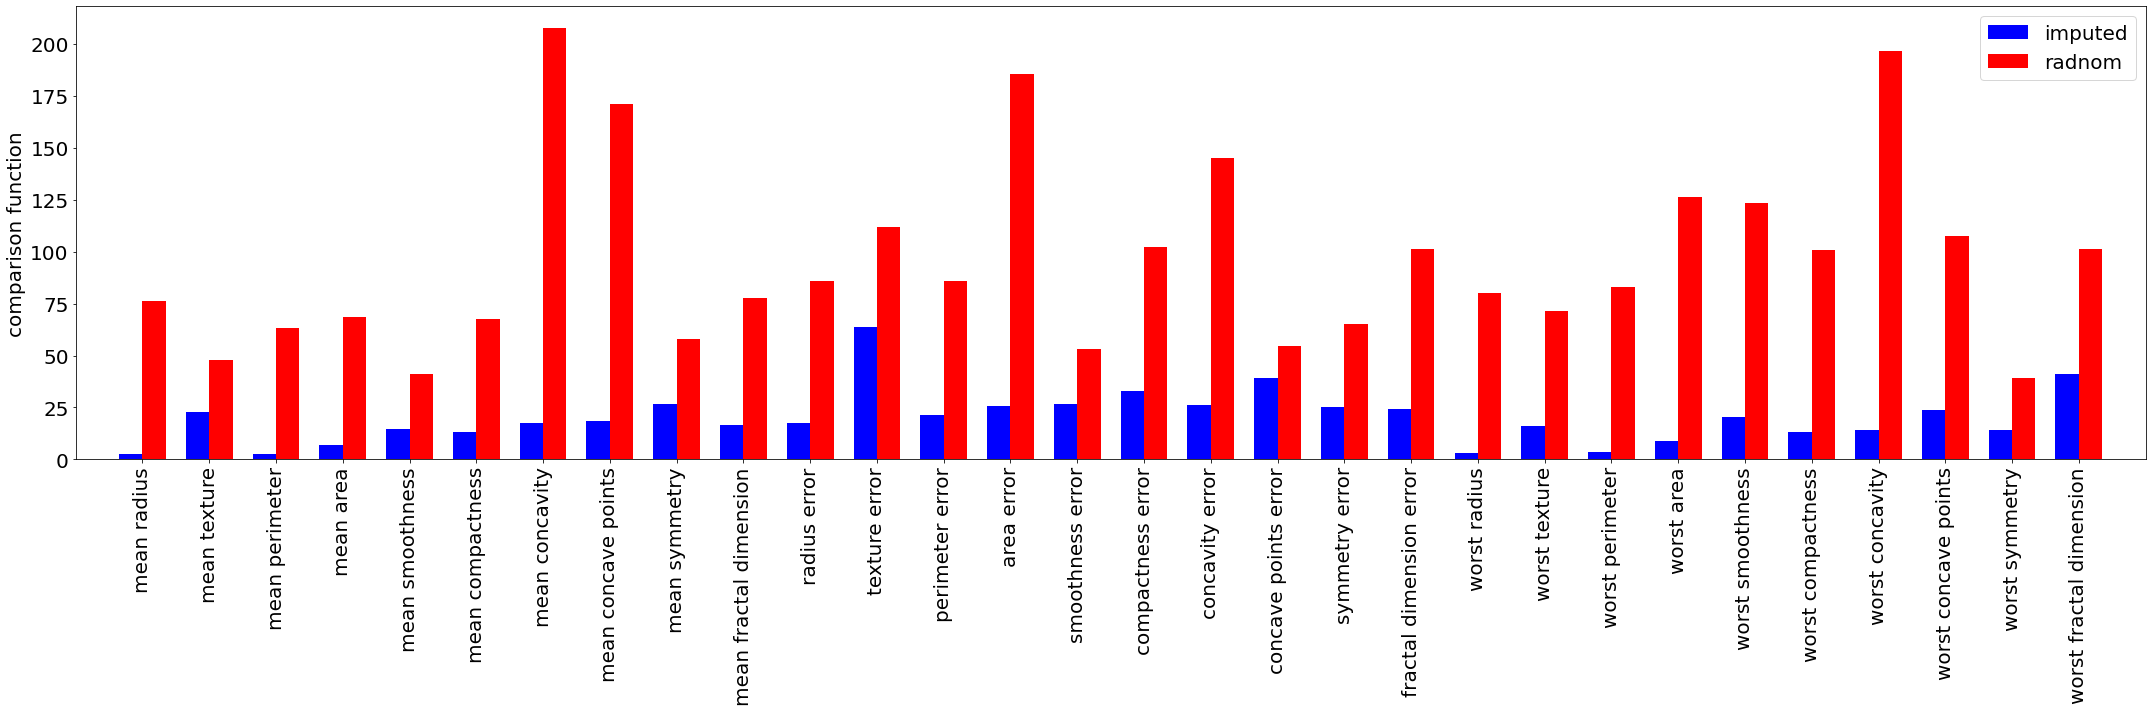

In [15]:
ax = imp.compare(data_n,com_f=mape,with_random=1,save=None) # compaer_with ='random'
ax.legend(fontsize=20)

((0.27966302238629376, 0.0897818164607885, 0.6014955748024045),
 (0.280636436795783, 0.0894662414695392, 0.6005780744025224))

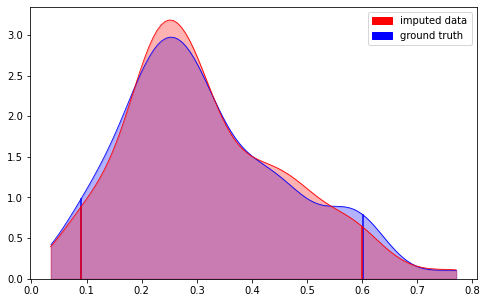

In [16]:
imp.dist('mean radius',truth=data_n,cl=95,bandwidth=0.05)

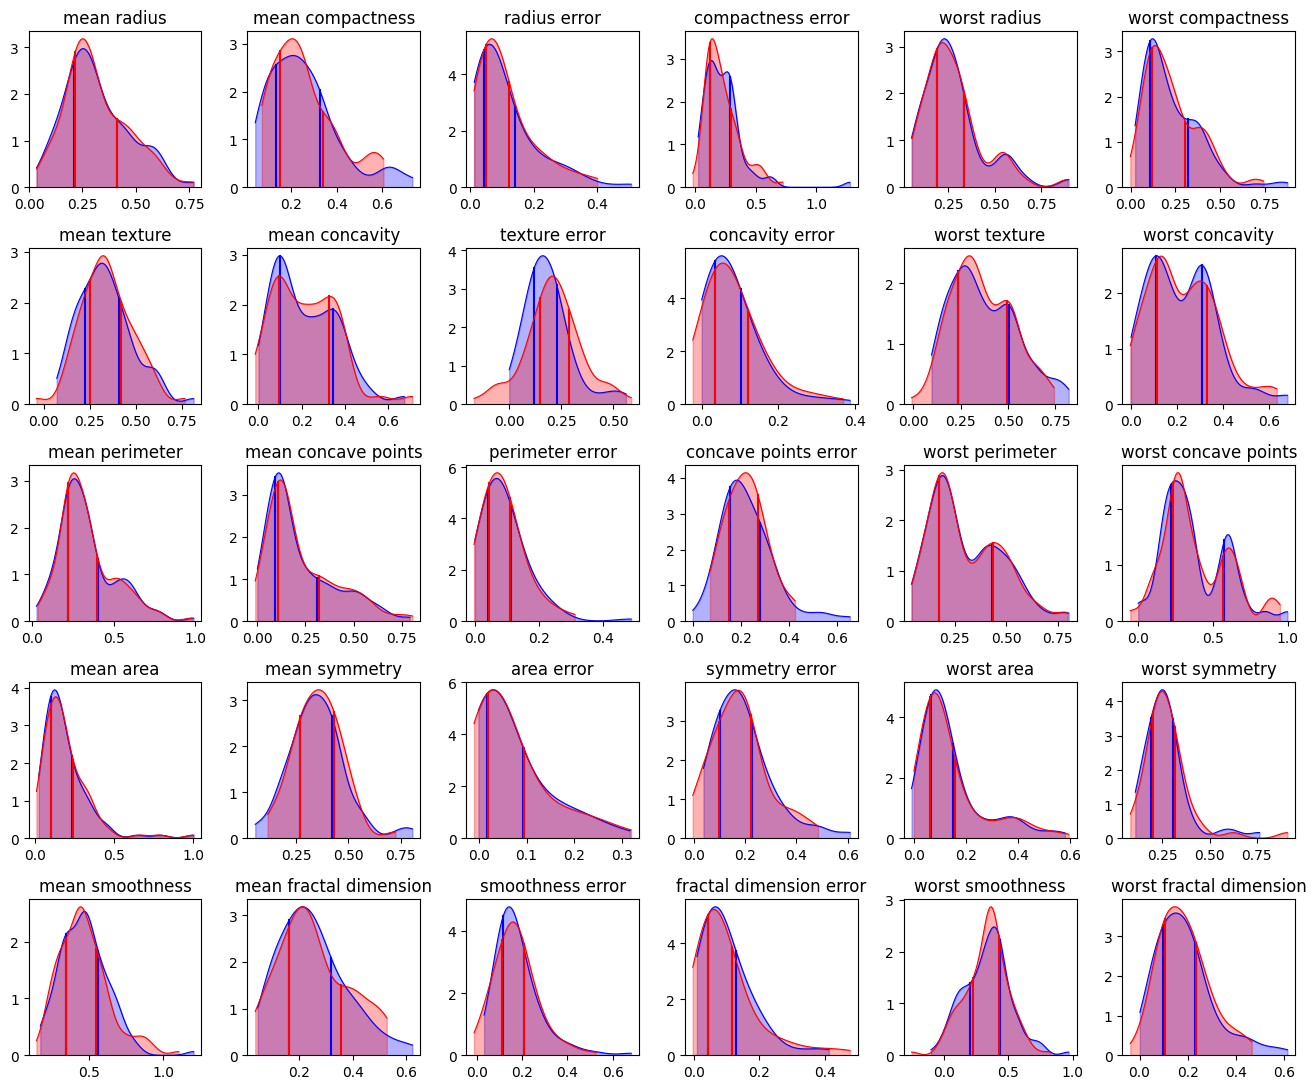

In [17]:
imp.dist_all(data_n,cl=50,bandwidth=0.05)

In [18]:
imp.general_report(data_n)

,rmse,mape,r2_score,ttest,mape_q1,mape_q2,mape_q3,mape_q4
mean radius,0.017896,2.584243,0.986090,0.996565,6.737805,0.967461,1.404413,1.814731
mean texture,0.107714,22.845002,0.448617,0.733100,35.230112,19.923756,12.385433,15.474153
mean perimeter,0.014623,2.770780,0.992844,0.998345,6.689519,1.116706,1.104803,1.737661
mean area,0.016831,6.736622,0.987519,0.925679,14.534180,3.571927,3.664280,3.847028
mean smoothness,0.085292,14.486520,0.713335,0.983771,23.768829,13.429393,9.679629,11.744778
mean compactness,0.035780,13.025878,0.946318,0.891352,22.517806,8.202258,9.520730,8.412208
mean concavity,0.035092,17.770723,0.943517,0.987222,39.040376,15.109712,7.872940,9.553231
mean concave points,0.038262,18.333630,0.954135,0.763467,26.132922,20.093576,13.329712,6.608323
mean symmetry,0.105431,26.819774,0.404219,0.877251,35.276326,21.243485,17.068261,19.366019
mean fractal dimension,0.049947,16.658800,0.843572,0.832442,26.786269,14.147495,16.387714,10.850667


In [16]:
imp.load('./')

In [71]:
# import numpy as np
# import pylab as plt
# import pandas as pd

# import pyreadr
# import pandas as pd

# # import tensorflow.compat.v1 as tf
# # tf.disable_v2_behavior()
# # from keras.datasets import mnist

# import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd

# # To use this experimental feature, we need to explicitly ask for it:
# from sklearn.experimental import enable_iterative_imputer  # noqa
# from sklearn.datasets import fetch_california_housing
# from sklearn.impute import SimpleImputer
# from sklearn.impute import IterativeImputer
# from sklearn.linear_model import BayesianRidge
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import ExtraTreesRegressor
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.pipeline import make_pipeline
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import r2_score

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

# import matplotlib.pyplot as plt

# def normalization (data, parameters=None):
#     '''Normalize data in [0, 1] range.
    
#     Args:
#         - data: original data
    
#     Returns:
#         - norm_data: normalized data
#         - norm_parameters: min_val, max_val for each feature for renormalization
#     '''

#     # Parameters
#     _, dim = data.shape
#     norm_data = data.copy()
    
#     if parameters is None:
    
#         # MixMax normalization
#         min_val = np.zeros(dim)
#         max_val = np.zeros(dim)
        
#         # For each dimension
#         for i in range(dim):
#             min_val[i] = np.nanmin(norm_data[:,i])
#             norm_data[:,i] = norm_data[:,i] - np.nanmin(norm_data[:,i])
#             max_val[i] = np.nanmax(norm_data[:,i])
#             norm_data[:,i] = norm_data[:,i] / (np.nanmax(norm_data[:,i]) + 1e-6)     
            
#         # Return norm_parameters for renormalization
#         norm_parameters = {'min_val': min_val,
#                                              'max_val': max_val}

#     else:
#         min_val = parameters['min_val']
#         max_val = parameters['max_val']
        
#         # For each dimension
#         for i in range(dim):
#             norm_data[:,i] = norm_data[:,i] - min_val[i]
#             norm_data[:,i] = norm_data[:,i] / (max_val[i] + 1e-6)    
            
#         norm_parameters = parameters        
            
#     return norm_data, norm_parameters


# def renormalization (norm_data, norm_parameters):
#     '''Renormalize data from [0, 1] range to the original range.
    
#     Args:
#         - norm_data: normalized data
#         - norm_parameters: min_val, max_val for each feature for renormalization
    
#     Returns:
#         - renorm_data: renormalized original data
#     '''
    
#     min_val = norm_parameters['min_val']
#     max_val = norm_parameters['max_val']

#     _, dim = norm_data.shape
#     renorm_data = norm_data.copy()
        
#     for i in range(dim):
#         renorm_data[:,i] = renorm_data[:,i] * (max_val[i] + 1e-6)     
#         renorm_data[:,i] = renorm_data[:,i] + min_val[i]
        
#     return renorm_data

def rmse_loss (ori_data, imputed_data, data_m):
    '''Compute RMSE loss between ori_data and imputed_data
    
    Args:
        - ori_data: original data without missing values
        - imputed_data: imputed data
        - data_m: indicator matrix for missingness
        
    Returns:
        - rmse: Root Mean Squared Error
    '''
    
#     ori_data, norm_parameters = normalization(ori_data)
#     imputed_data, _ = normalization(imputed_data, norm_parameters)
        
    # Only for missing values
    nominator = np.sum(data_m * ( ori_data - imputed_data)**2)
    denominator = np.sum(data_m)
    
    rmse = np.sqrt(nominator/float(denominator))
    
    return rmse

def binary_sampler(p, rows, cols):
    '''Sample binary random variables.
    
    Args:
        - p: probability of 1
        - rows: the number of rows
        - cols: the number of columns
        
    Returns:
        - binary_random_matrix: generated binary random matrix.
    '''
    unif_random_matrix = np.random.uniform(0., 1., size = [rows, cols])
    binary_random_matrix = 1*(unif_random_matrix < p)
    return binary_random_matrix


def uniform_sampler(low, high, rows, cols):
    '''Sample uniform random variables.
    
    Args:
        - low: low limit
        - high: high limit
        - rows: the number of rows
        - cols: the number of columns
        
    Returns:
        - uniform_random_matrix: generated uniform random matrix.
    '''
    return np.random.uniform(low, high, size = [rows, cols])             


def sample_batch_index(total, batch_size):
    '''Sample index of the mini-batch.
    
    Args:
        - total: total number of samples
        - batch_size: batch size
        
    Returns:
        - batch_idx: batch index
    '''
    total_idx = np.random.permutation(total)
    batch_idx = total_idx[:batch_size]
    return batch_idx

# def data_load(prefix='data/',i=0,part = '1st'):

#     frame = {'data':[],'masked':[]}
#     template = 'dffinal_repeat_select_widformat_t{}_{}{}.RData'
#     for typ in ['','masked_']:
#         fname = template.format(i,typ,part)
#         result = pyreadr.read_r(prefix+fname)
#         key = list(result.keys())[0]
#         if typ=='':
#             frame['data'] = result[key]
#         else:
#             frame['masked'] = result[key]

#     return frame


## GAIN loss
# D_loss_temp = -tf.reduce_mean(M * tf.log(D_prob + 1e-8)+ (1-M) * tf.log(1. - D_prob + 1e-8)) 
# G_loss_temp = -tf.reduce_mean((1-M) * tf.log(D_prob + 1e-8))
# MSE_loss = tf.reduce_mean((M * X - M * G_sample)**2) / tf.reduce_mean(M)
# D_loss = D_loss_temp
# G_loss = G_loss_temp + alpha * MSE_loss 
def d_loss(M,D_prob):
    D_loss_temp = -tf.reduce_mean(M * tf.math.log(D_prob + 1e-8) + (1-M) * tf.math.log(1. - D_prob + 1e-8)) 
    return D_loss_temp
    
def g_loss1(M,D_prob):
    G_loss_temp = -tf.reduce_mean((1-M) * tf.math.log(D_prob + 1e-8))
    return G_loss_temp

def g_loss2(rvals,nng):
    MSE_loss = tf.reduce_mean((rvals - nng)**2) 
    return MSE_loss

class GAIN:
    def __init__(self,dim,alpha):

        tf.keras.backend.clear_session()
        # Data vector
        X = tf.keras.layers.Input(shape=dim)
        # Mask vector 
        M = tf.keras.layers.Input(shape=dim)
        # Hint vector
        H = tf.keras.layers.Input(shape=dim)
        h_dim = int(dim)//2
        g_con = tf.keras.layers.Concatenate(axis=1)([X, M])
        g_1 = tf.keras.layers.Dense(h_dim,activation='relu')(g_con)
        g_2 = tf.keras.layers.Dense(h_dim,activation='relu')(g_1)
        g_2 = tf.keras.layers.Dropout(0.3)(g_2)
        g_3 = tf.keras.layers.Dense(dim,activation='relu')(g_2)
        Hat_inp = X * M + g_3 * (1-M)
        nng = g_3 * M
        
        d_con = tf.keras.layers.Concatenate(axis=1)([X, H])
        d_1 = tf.keras.layers.Dense(h_dim,activation='relu')(d_con)
        d_2 = tf.keras.layers.Dense(h_dim,activation='relu')(d_1)
        d_3 = tf.keras.layers.Dense(dim,activation='sigmoid')(d_2)

        # Generator
        self.generator = tf.keras.Model(inputs=[X,M], outputs=[Hat_inp],name='generator')
        self.discriminator = tf.keras.Model(inputs=[X,H], outputs=[d_3],name='discriminator')

        # generator.summary()
        # discriminator.summary()
        Hat_X = self.generator([X, M])

        # Discriminator
        D_prob = self.discriminator([Hat_X, H])

        optimizer = Adam(0.001, 0.5)
#         self.discriminator.compile(loss=d_loss,
#                               optimizer=optimizer,
#                               metrics=['accuracy'])
        dls = BinaryCrossentropy(from_logits=True)
        self.discriminator.compile(loss=dls,#'binary_crossentropy',
                              optimizer=optimizer,
                              metrics=['accuracy'])

        self.combined = Model(inputs=[X,M,H] , outputs=[D_prob, nng])
        gls = BinaryCrossentropy(from_logits=True)
        
        if alpha==0:
            self.combined.compile(loss=[gls],optimizer=optimizer,metrics=['accuracy'])
        else:
            self.combined.compile(loss=[gls,'mse'],
                             loss_weights=[1-alpha,alpha],
                             optimizer=optimizer,metrics=['accuracy'])
            
#         self.combined.compile(loss=[g_loss1,g_loss2],
#                          loss_weights=[1-alpha,alpha],
#                          optimizer=optimizer)
    def train(self,x,notmask,epochs,batch_size=128,hint_rate=0.8):
        
        no,dim = x.shape
        loss1 = []
        loss2 = []

        for it in range(epochs):        

            batch_idx = sample_batch_index(no, batch_size)
            x_map = x[batch_idx, :]    
            mask_map = notmask[batch_idx, :]
            r_map = uniform_sampler(0, 0.01, batch_size, dim) 
            hint_map = binary_sampler(hint_rate, batch_size, dim)
            hint_map = mask_map * hint_map
            rvals = mask_map * x_map

            x_map = x_map.astype(np.float32)
            hint_map = hint_map.astype(np.float32)
            mask_map = mask_map.astype(np.float32)
            rvals = rvals.astype(np.float32)

            loss1.append(gain.discriminator.train_on_batch(x=[x_map,hint_map],y=mask_map))
            loss2.append(gain.combined.train_on_batch(x=[x_map,mask_map,hint_map],y=[mask_map,rvals]))
            
        loss1 = np.array(loss1)
        loss2 = np.array(loss2)
            
        return loss1,loss2

/home/gf/miniconda3/envs/impute/lib/python3.8/site-packages/tensorflow/python/keras/backend.py:5016: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


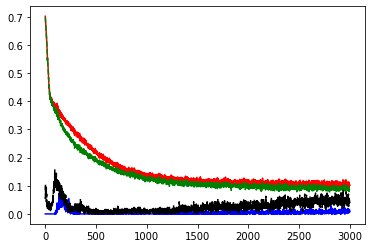

In [72]:
batch_size = 256
epochs = 3000
alpha = 0.0
hint_rate = 0.99

# frame = data_load(prefix='data/',i=i,part = j)

# xx = frame['data'].drop(columns=['PT_ID']).values
# normin = xx.min(axis=0)
# xx = xx-normin[None,:]
# normax = xx.max(axis=0)
# xx = xx/normax[None,:]

# masked = frame['masked'].drop(columns=['PT_ID']).values
# notmask = ~np.isnan(masked)
# np.mean(data_m)

# no,dim = xx.shape


# inds = np.arange(no)
# np.random.shuffle(inds)

# n_train = 6000

# x_train = xx[inds[:n_train]]
# nmask_train = notmask[inds[:n_train]]
# x_test = xx[inds[n_train:]]
# nmask_test = notmask[inds[n_train:]]

# inds = np.arange(no)
# np.random.shuffle(inds)
# n_train = 6000
# x_train = xx[inds[:n_train]]
# nmask_train = notmask[inds[:n_train]]


no,dim = masked_n.shape
notmask = ~np.isnan(masked_n)
notmask = notmask.values

masked_nr = fill_random(masked_n).values

gain = GAIN(dim,alpha)
loss1,loss2 = gain.train(masked_nr,notmask,epochs=epochs,batch_size=batch_size,hint_rate=hint_rate)

plt.plot(loss1[:,0],'r')
plt.plot(loss1[:,1],'b')
plt.plot(loss2[:,1],'g--')
plt.plot(loss2[:,3],'k--')

In [73]:
pred = gain.generator.predict([masked_nr, notmask])

In [74]:
np.sum(  (pred[notmask]-data_n.values[notmask])**2 )

8.285118751292471e-13

In [75]:
np.sum(  (pred[~notmask]-data_n.values[~notmask])**2 )

10592.3350164736

In [76]:
im_ = pred[~notmask]
tr_ = data_n.values[~notmask]

mape(tr_ ,im_),rmse(tr_ ,im_)

(790.2989553801247, 2.016084118117409)

In [3]:
if not in_notebook():
    import argparse
    parser = argparse.ArgumentParser(description='MODEL ACTIVITY ANALYZER.')
    parser.add_argument('--dataset', default='./dataset', type=str, help='path to dataset')
    parser.add_argument('--fillm', default='random', type=str, help='filling initiation')
    parser.add_argument('--mlm', default='LR', type=str, help='ML method')
    parser.add_argument('--nl', default=4, type=int, help='NN # of layers')
    parser.add_argument('--batchnorm', default=0, type=int, help='batch norm layer for NN')
    parser.add_argument('--dropout', default=0.0, type=float, help='dropout layer for NN')
    parser.add_argument('--iterate', default=0, type=int, help='# iteration')
    parser.add_argument('--dtime', default=0, type=int, help='data section time')
    parser.add_argument('--prefix', default='', type=str, help='prefix')
    
    args = parser.parse_args()
    data_path = args.dataset
    fill_method = args.fillm
    mlm = args.mlm
    nlayer = args.nl
    batchnorm = args.dropout
    dropout = args.dropout
    n_iterate = args.iterate
    dtime = args.dtime
    prefix = args.prefix

else:
    data_path = '../jiang/SimulationLabData/data/'
    fill_method='random'
    mlm = 'LR'
    nlayer = 4
    batchnorm = 1
    dropout = 0.1
    n_iterate = 10
    dtime = 1
    prefix = ''

if dtime<2:
    dtime = '_'+str(dtime)
elif dtime==2:
    dtime = ''
else:
    assert 0,'dtime is not recognized!'

realization = '2nd'


if mlm in skmodels.keys():
    prefix = prefix+'{}-{}'.format(fill_method,mlm)
    kargs = {}
    model_ = skmodels[mlm]
elif mlm=='NN':
    prefix = prefix+'{}-NN-nl{}-bt{}-do{}'.format(fill_method,nlayer,batchnorm,dropout)
    kargs = {'epochs':3,'verbose':0}

    def model_():
        return dense_model(inp=44,
                           out=1,
                           nlayer=nlayer,
                           batchnorm=batchnorm,
                           dropout=dropout,
                           loss='mean_squared_error',
                           optimizer='adam',
                           kernel_initializer='normal')
    
    model = model_()
    model.summary()
else:
    assert 0,'model not regognized!'

# Path('results2').mkdir(parents=True, exist_ok=True)
# Path('results2/'+prefix).mkdir(parents=True, exist_ok=True)

model_path = 'results/'+prefix+'/'

data = pd.read_hdf('data_{}{}.h5'.format(realization,dtime),'data').drop(columns=['PT_ID'])
masked = pd.read_hdf('data_{}{}.h5'.format(realization,dtime),'masked').drop(columns=['PT_ID'])

normin,normax = get_rescale(masked.values)
masked_n = set_rescale(masked,normin,normax)
data_n = set_rescale(data,normin,normax)

imp = Imputer(masked_n,model_,loss_f=None,fill_method=fill_method,save_history=True)
if os.path.exists(model_path+'model.pkl'):
    imp.load(model_path)

imp.impute(n_iterate,inds=None,**kargs)
imp.save(model_path)


No handles with labels found to put in legend.


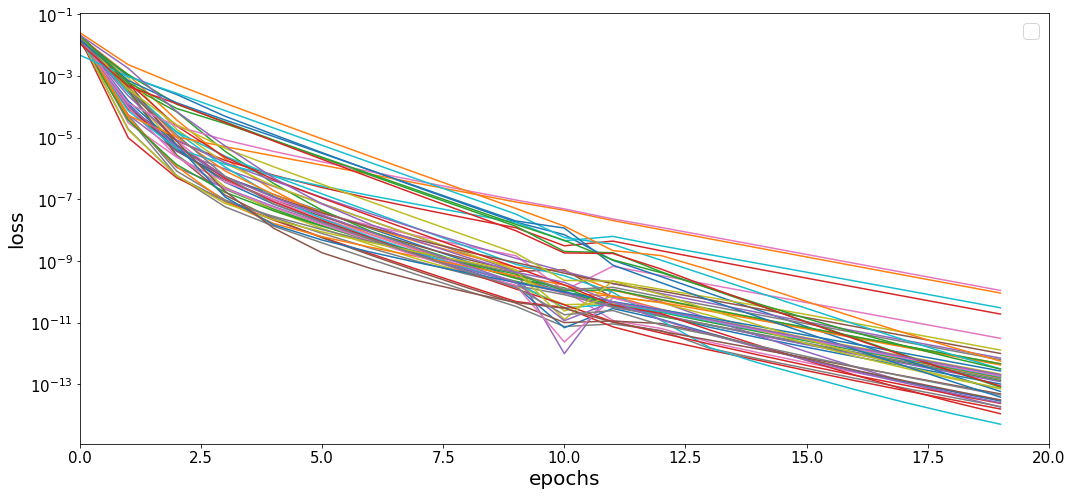

In [18]:
fig,ax = plt.subplots(figsize=(15,7))
ax = imp.plot_loss_frame(ax)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlim(0,imp.loss_frame.shape[0])
ax.set_xlabel('epochs', fontsize=20)
ax.set_ylabel('loss', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)
# ax.tick_params(axis='both', which='minor', labelsize=8)
ax.set_yscale('log')
ax.legend(fontsize=20)
plt.tight_layout()
plt.savefig(model_path+'loss.jpg',dpi=100)

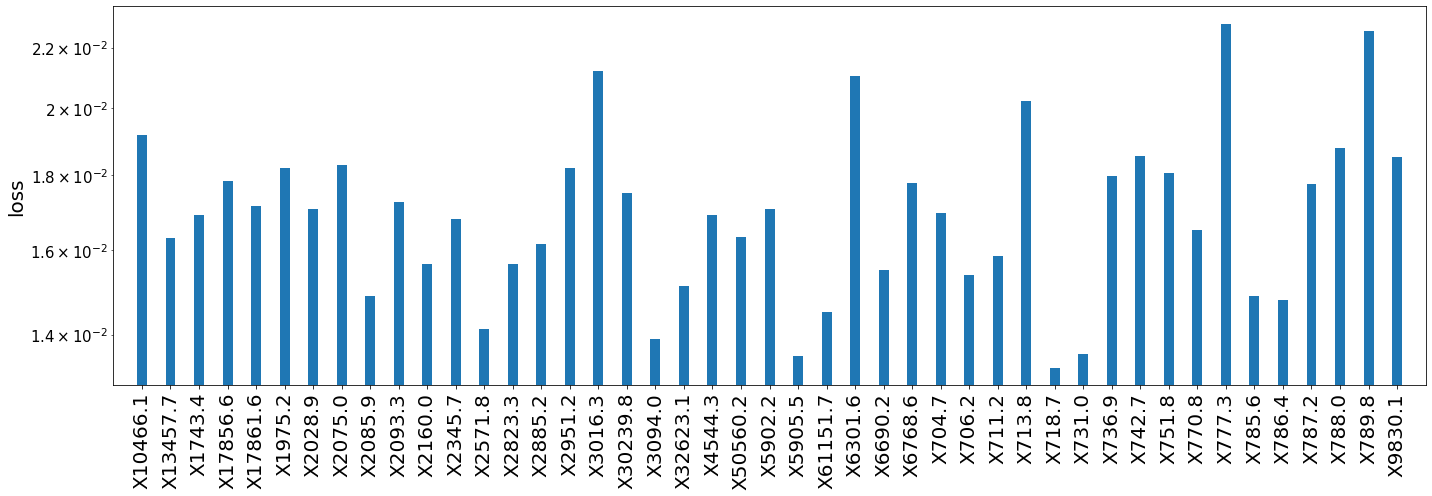

In [22]:
fig,ax = plt.subplots(figsize=(20,7))

imp.compare(data_n,ax)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('loss', fontsize=20)
ax.set_xticks(np.arange(imp.ncol))
ax.set_xticklabels(imp.cols,rotation=90)
ax.set_xlim(-1,imp.ncol)
ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=15)
# ax.legend(fontsize=20)
plt.tight_layout()
plt.savefig(model_path+'labs.jpg',dpi=100)